# Digit Recognition Using SVM

We'll first explore the dataset a bit, prepare it (scale etc.) and then experiment with linear and non-linear SVMs with various hyperparameters.


## Data Understanding 

Let's first understand the shape, attributes etc. of the dataset.

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import math

# dataset
df = pd.read_csv("train.csv")

### About the dataset

In [2]:
# dimensions
print("Dimensions: ", df.shape, "\n")

Dimensions:  (42000, 785) 



In [3]:
# data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [4]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
# Top 5 Rows
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Column names
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [7]:
# Printing Unique Labels
digits = list(np.sort(df['label'].unique()))
print(digits)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


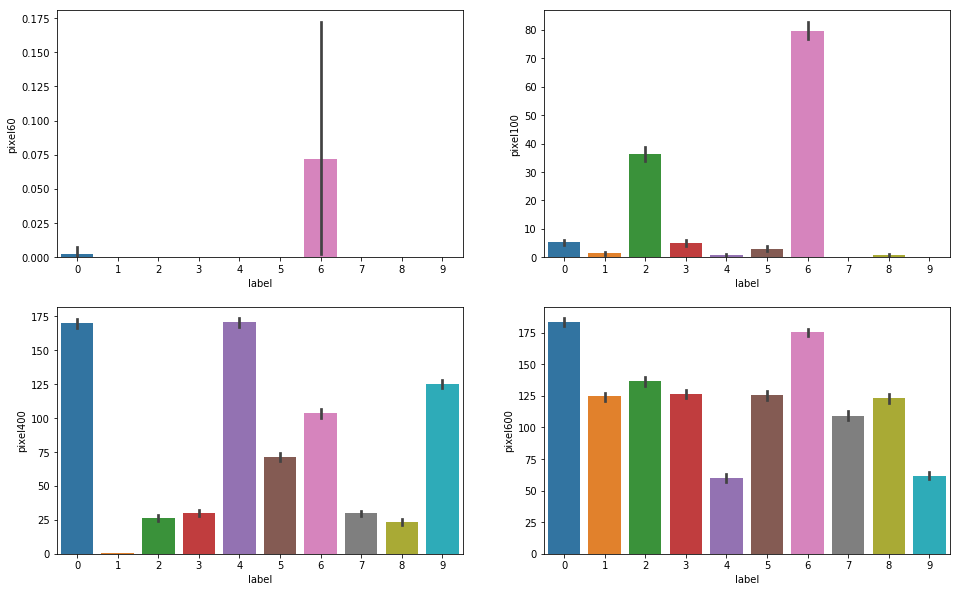

In [8]:
# basic plots: How do various attributes vary with the labels/digits
plt.figure(figsize=(16,10))

# subplot 1/4
plt.subplot(221)
sns.barplot(x='label', y='pixel60', 
            data=df, 
            order=digits)

# subplot 2/4
plt.subplot(222)
sns.barplot(x='label', y='pixel100', 
            data=df, 
            order=digits)

# subplot 3/4
plt.subplot(223)
sns.barplot(x='label', y='pixel400', 
            data=df, 
            order=digits)

# subplot 4/4
plt.subplot(224)
sns.barplot(x='label', y='pixel600', 
            data=df, 
            order=digits)
plt.show()

In [9]:
# Checking for any null values
sum(df.isnull().sum())

0

In [10]:
# Count of each digits
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

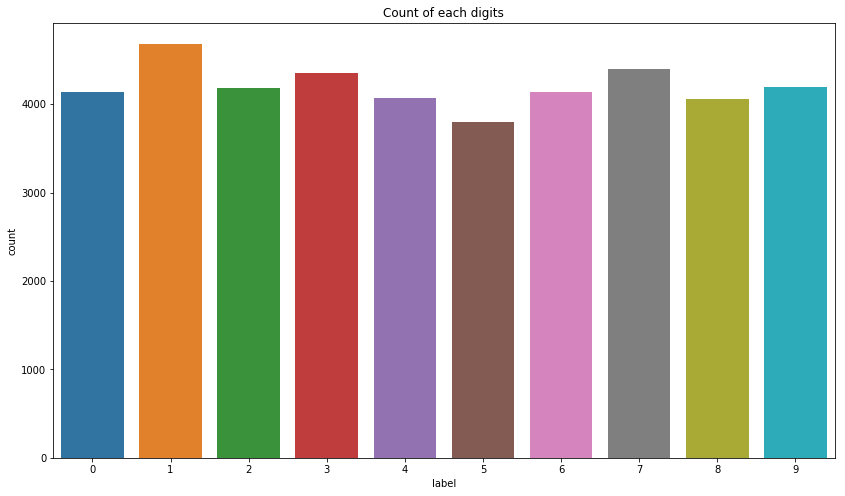

In [11]:
# Plotting digit counts
plt.figure(figsize=(14,8))
sns.countplot(df["label"])
plt.title("Count of each digits")
plt.show()

In [12]:
# Plot the image represented by rows
def plot_number(row, w=28, h=28, labels=True):
    if labels:
        # First column contains the label
        label = row[0]
        # Rest of columns are pixels
        pixels = row[1:]
    else:
        label = ''
        # The rest of columns are pixels
        pixels = row[0:]   
# print(row.shape, pixels.shape)
    # Make those columns into a array of 8-bits pixels. This array will be of 1D with length 784. The pixel intensity values are integers from 0 to 255
    pixels = 255-np.array(pixels, dtype='uint8')
    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((w, h))
    # Plot
    if labels:
        plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')

# Plot a whole slice of picture
def plot_slice(rows, size_w=28, size_h=28, labels=True):
    num = rows.shape[0]
    w = 4
    h = math.ceil(num / w)
    fig, plots = plt.subplots(h, w)
    fig.tight_layout()

    for n in range(0, num):
        s = plt.subplot(h, w, n+1)
        s.set_xticks(())
        s.set_yticks(())
        plot_number(rows.iloc[n], size_w, size_h, labels)
    plt.show()

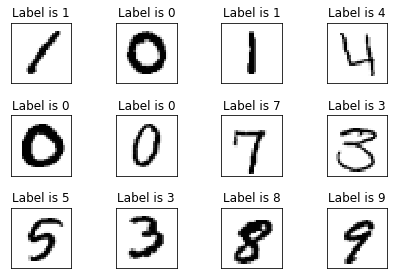

In [13]:
# Plotting first few rows
plot_slice(df[0:12])

## Data Preparation

Let's conduct some data preparation steps before modeling. Firstly, let's see if it is important to **rescale** the features, since they may have varying ranges. For example, here are the average values:

In [14]:
# splitting into X and y
X = df.drop("label", axis = 1)
y = df['label']

In [15]:
# Selecting 20% of total data from train set, keeping the equal proportion of each digit by using stratify
X_train, X_test80, y_train, y_test80 = train_test_split(X, y, test_size = 0.8, stratify = y, random_state = 42)
df_train = pd.concat([X_train,y_train], axis=1)
df_train = df_train.reset_index(drop=True)
df_train.shape

(8400, 785)

In [16]:
df_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


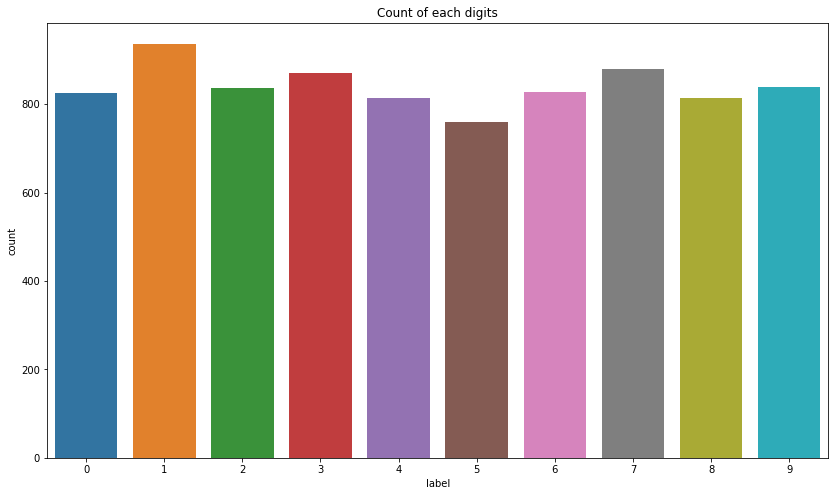

In [17]:
# Plotting count of each digits to check the proportion of each digits selected in subset
plt.figure(figsize=(14,8))
sns.countplot(df_train['label'])
plt.title("Count of each digits")
plt.show()

In [18]:
# splitting into X and y
X = df_train.drop("label", axis = 1)
y = df_train['label']

In [19]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


## Model Building

Let's first build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.m

In [20]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [21]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9043650793650794 

[[235   0   2   0   0   3   1   0   2   0]
 [  0 276   1   0   1   1   0   2   1   0]
 [  4   3 227   3   5   2   2   4   3   1]
 [  1   2  13 219   1  15   1   2   7   1]
 [  0   3   4   0 236   0   1   1   1  11]
 [  3   1   2  15   0 203   3   3   5   0]
 [  5   1   2   1   1   1 204   0   0   0]
 [  1   1   2   3   4   0   0 239   0   7]
 [  1  12   5   6   3  13   3   1 216   3]
 [  1   1   1   3   9   2   1  10   0 224]]


The linear model gives approx. 90.43% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [22]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       243
           1       0.92      0.98      0.95       282
           2       0.88      0.89      0.88       254
           3       0.88      0.84      0.86       262
           4       0.91      0.92      0.91       257
           5       0.85      0.86      0.85       235
           6       0.94      0.95      0.95       215
           7       0.91      0.93      0.92       257
           8       0.92      0.82      0.87       263
           9       0.91      0.89      0.90       252

   micro avg       0.90      0.90      0.90      2520
   macro avg       0.90      0.90      0.90      2520
weighted avg       0.90      0.90      0.90      2520



In [23]:
# non-linear model
# using rbf kernel, default value of gamma and default c=1

# model
non_linear_model =SVC(kernel='rbf', random_state=42, verbose=True)
non_linear_model1 = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

[LibSVM]

C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9218253968253968 

[[234   0   2   0   0   3   2   0   2   0]
 [  0 276   1   0   1   1   1   1   1   0]
 [  3   1 242   1   1   0   2   1   2   1]
 [  0   1  16 225   0   6   2   2   7   3]
 [  0   2   5   0 240   2   0   1   0   7]
 [  3   0   5  13   1 205   4   1   3   0]
 [  4   1   7   0   0   1 201   0   1   0]
 [  0   2   7   0   1   0   0 233   0  14]
 [  3   5   4   5   0   7   2   1 235   1]
 [  0   1   3   5   5   2   0   4   0 232]]


The non-linear model gives approx. 92.18% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

In [25]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       243
           1       0.96      0.98      0.97       282
           2       0.83      0.95      0.89       254
           3       0.90      0.86      0.88       262
           4       0.96      0.93      0.95       257
           5       0.90      0.87      0.89       235
           6       0.94      0.93      0.94       215
           7       0.95      0.91      0.93       257
           8       0.94      0.89      0.91       263
           9       0.90      0.92      0.91       252

   micro avg       0.92      0.92      0.92      2520
   macro avg       0.92      0.92      0.92      2520
weighted avg       0.92      0.92      0.92      2520



## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [26]:
# creating a KFold object with 3 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, 
                        n_jobs = -1)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  9.2min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [27]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,46.012821,0.490617,10.504122,0.029970,1,0.01,"{'C': 1, 'gamma': 0.01}",0.713265,0.711224,0.734184,0.719558,0.010376,15,1.000000,1.000000,1.000000,1.000000,0.000000
1,13.325790,0.172269,6.967778,0.247786,1,0.001,"{'C': 1, 'gamma': 0.001}",0.927041,0.922959,0.919898,0.923299,0.002926,4,0.974235,0.973469,0.972194,0.973299,0.000842
2,19.672462,0.199524,9.353304,0.126903,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.889796,0.884694,0.882653,0.885714,0.003004,11,0.907143,0.908418,0.909439,0.908333,0.000939
3,43.875637,0.216594,11.601733,0.036239,1,1e-05,"{'C': 1, 'gamma': 1e-05}",0.616837,0.610714,0.606122,0.611224,0.004389,16,0.609184,0.641582,0.631633,0.627466,0.013551
4,44.495328,1.228714,10.831519,0.293156,10,0.01,"{'C': 10, 'gamma': 0.01}",0.733673,0.730612,0.757143,0.740476,0.011851,12,1.000000,1.000000,1.000000,1.000000,0.000000
5,11.188773,0.044847,6.259360,0.033092,10,0.001,"{'C': 10, 'gamma': 0.001}",0.936224,0.928571,0.930612,0.931803,0.003236,1,0.999745,0.999235,0.999235,0.999405,0.000241
6,9.032909,0.275063,5.830687,0.014932,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.927551,0.919898,0.916327,0.921259,0.004682,5,0.965816,0.963520,0.962245,0.963861,0.001478
7,18.801224,0.513621,9.124974,0.164395,10,1e-05,"{'C': 10, 'gamma': 1e-05}",0.890816,0.884184,0.886224,0.887075,0.002774,10,0.907398,0.907908,0.908929,0.908078,0.000636
8,45.354854,0.176377,11.118389,0.483023,100,0.01,"{'C': 100, 'gamma': 0.01}",0.733673,0.730612,0.757143,0.740476,0.011851,12,1.000000,1.000000,1.000000,1.000000,0.000000
9,11.560036,0.239258,6.672068,0.142897,100,0.001,"{'C': 100, 'gamma': 0.001}",0.934694,0.928061,0.931633,0.931463,0.002710,2,1.000000,1.000000,1.000000,1.000000,0.000000


In [28]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

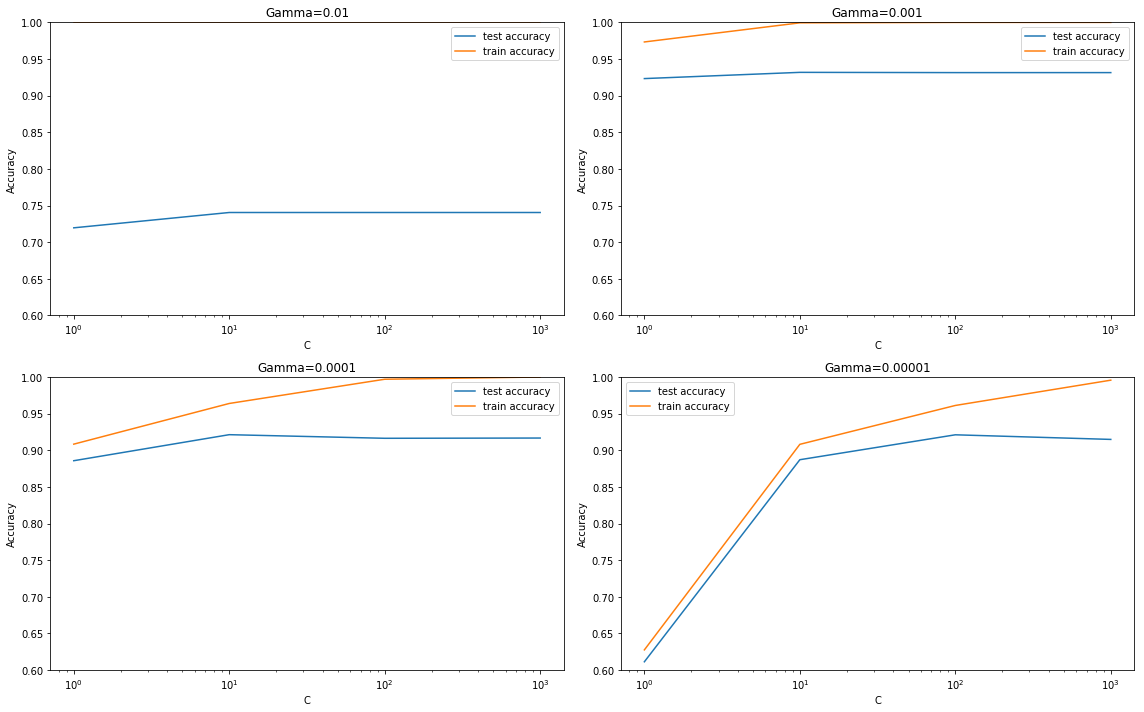

In [29]:
# # plotting
plt.figure(figsize=(16,10))

# subplot 1/4
plt.subplot(221)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='best')
plt.xscale('log')

# subplot 2/4
plt.subplot(222)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='best')
plt.xscale('log')


# subplot 3/4
plt.subplot(223)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='best')
plt.xscale('log')

# subplot 4/4
plt.subplot(224)
gamma_00001 = cv_results[cv_results['param_gamma']==1e-05]

plt.plot(gamma_00001["param_C"], gamma_00001["mean_test_score"])
plt.plot(gamma_00001["param_C"], gamma_00001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.00001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='best')
plt.xscale('log')

plt.tight_layout()

The plots above show some useful insights:
- Non-linear models (high gamma) perform *much better* than the linear ones
- At any value of gamma, a high value of C leads to better performance
- None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other

This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

Let's now choose the best hyperparameters. 

In [30]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9318027210884354 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [31]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9341269841269841 

[[234   0   3   0   0   3   2   0   1   0]
 [  0 277   2   0   1   1   0   1   0   0]
 [  3   0 243   1   1   0   1   3   1   1]
 [  0   1  13 229   0   7   0   3   7   2]
 [  0   2   3   0 242   2   0   1   0   7]
 [  2   0   4  11   0 211   2   1   4   0]
 [  4   0   6   0   0   2 202   0   1   0]
 [  0   1   6   0   0   1   0 240   0   9]
 [  1   4   3   3   0   4   4   2 240   2]
 [  0   1   2   3   5   2   0   3   0 236]] 



In [32]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9318027210884354 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [33]:
# model with optimal hyperparameters (predicting for remaining 80% of the train data which we excluded in starting)

X_test80 = scale(X_test80)
y_pred80 = model.predict(X_test80)

# metrics
print("accuracy", metrics.accuracy_score(y_test80, y_pred80), "\n")
print(metrics.confusion_matrix(y_test80, y_pred80), "\n")

C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


accuracy 0.9375892857142857 

[[3219    0   26    3    3   11   29    3   12    0]
 [   0 3677   26    6    6    5    5    7   10    5]
 [  17   35 3145   22   25   10   17   37   27    6]
 [   7   14  141 3161    3   56    7   28   47   17]
 [   9    5   51    1 3071   11   22   17    8   63]
 [  15    8   42   76    6 2788   53    8   24   16]
 [  27    3   48    0    9   39 3174    1    9    0]
 [   7   20   69    5   34    4    1 3268    8  105]
 [  15   41   50   49   18   76   19   13 2943   26]
 [  15    7   50   19   76   17    1   87   21 3057]] 



So, on remaining 80% of the training data, the accuracy of the model is `93.75`.

### Predictions on test Set

In [34]:
X_test1=pd.read_csv('test.csv')
X_test1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_test = scale(X_test1)
X_test.shape

C:\Users\shadab.hussain01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


(28000, 784)

In [36]:
predicted = model.predict(X_test)

In [37]:
df_test_predict = pd.DataFrame({'ImageId':X_test1.index+1, 'Label':predicted})
df_test_predict.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [38]:
# Importing predicted result on test data to a csv file
df_test_predict.to_csv('Pred_digit.csv',index=False)

In [39]:
df_new=pd.read_csv('Pred_digit.csv')
df_new.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [40]:
df_new.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [41]:
df_new.Label.unique()

array([2, 0, 9, 4, 3, 7, 5, 1, 6, 8], dtype=int64)